In [1]:
import madrigalWeb.madrigalWeb
import pandas
import numpy
import datetime
import seaborn as sns
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
madDB = madrigalWeb.madrigalWeb.MadrigalData('http://madrigal.haystack.mit.edu/madrigal')
instList = madDB.getAllInstruments()

In [4]:
for _i in instList:
    if _i.name == "Millstone Hill IS Radar":
        selInst = _i
selInstCode = selInst.code

In [9]:
exps = madDB.getExperiments(\
            selInstCode, 2015, 3, 17, 0, 0,\
            0, 2015, 3, 18, 0, 0, 0)

In [12]:
print "Num of exps found--->", len(exps)
selExp = exps[0]
print selExp

Num of exps found---> 2
id: 10002439
realUrl: http://madrigal.haystack.mit.edu/cgi-bin/madrigal/madExperiment.cgi?exp=experiments/2015/mlh/17mar15a&displayLevel=0&expTitle=Van+Allen+Conjunction+Probe
url: http://madrigal.haystack.mit.edu/cgi-bin/madrigal/madtoc/experiments/2015/mlh/17mar15a
name: Van Allen Conjunction Probe
siteid: 1
sitename: Millstone
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2015
startmonth: 3
startday: 17
starthour: 15
startmin: 10
startsec: 54
endyear: 2015
endmonth: 3
endday: 18
endhour: 0
endmin: 8
endsec: 45
isLocal: True
madrigalUrl: http://madrigal.haystack.mit.edu/madrigal
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1430962203
access: 0
Madrigal version: 2.6.4



In [14]:
fileList = madDB.getExperimentFiles(selExp.id)
for _n,_f in enumerate(fileList):
    print _n,_f.kindatdesc

0 Combined basic parameters file - all antennas and modes
1 Zenith single-pulse basic parameters
2 Zenith alternating-code basic parameters
3 MISA (steerable) single-pulse basic parameters
4 MISA (steerable) alternating-code basic parameters
5 Gridded data fitted to a uniform spatial and temporal grid - useful for modellers
6 Derived vector ion velocities


In [16]:
userName = 'Bharat Kunduri' 
userEmail = 'bharatr@vt.edu' 
userAffltn = 'VT'
dwnldFile = '../data/MH-2015-storm.hdf5'
dwnldformat = "hdf5"

In [17]:
madDB.downloadFile( fileList[0].name, dwnldFile,\
                   userName, userEmail,\
                   userAffltn, format=dwnldformat )

In [24]:
mhDF = pandas.HDFStore("../data/MH-2015-storm.hdf5")["/Data/Table Layout"]
mhDF["date1"] = pandas.to_datetime(mhDF["ut1_unix"], unit='s')
mhDF["date2"] = pandas.to_datetime(mhDF["ut2_unix"], unit='s')
# Convert ne/dne to log scale
mhDF["ne"] = numpy.log10(mhDF["ne"])
mhDF["dne"] = numpy.log10(mhDF["dne"])
# choose only those columns we need!
mhDF = mhDF[ ["date1", "date2", "gdlat", "gdalt",\
        "glon", "vo", "dvo", "ne", "dne",\
        "az1", "az2", "el1", "el2", "scntyp"] ]
mhDF.head()

,date1,date2,gdlat,gdalt,glon,vo,dvo,ne,dne,az1,az2,el1,el2,scntyp
0,2015-03-17 15:10:54,2015-03-17 15:13:54,42.57,141.67,-71.49,NaN,NaN,NaN,NaN,178.0,178.0,88.0,88.0,1.0
1,2015-03-17 15:10:54,2015-03-17 15:13:54,42.57,159.64,-71.49,40.3,47.7,11.002348,10.097243,178.0,178.0,88.0,88.0,1.0
2,2015-03-17 15:10:54,2015-03-17 15:13:54,42.56,177.62,-71.49,54.6,34.6,11.130797,10.012031,178.0,178.0,88.0,88.0,1.0
3,2015-03-17 15:10:54,2015-03-17 15:13:54,42.55,195.59,-71.49,54.4,7.8,11.182837,9.292958,178.0,178.0,88.0,88.0,1.0
4,2015-03-17 15:10:54,2015-03-17 15:13:54,42.55,213.57,-71.49,60.4,6.3,11.204814,9.047940,178.0,178.0,88.0,88.0,1.0


In [59]:
# Plot an azimuth scan
d1 = datetime.datetime(2015,3,17,19,0)
d2 = datetime.datetime(2015,3,17,19,35)
mhDFAzm = mhDF[ (mhDF["scntyp"] == 2) &\
               (mhDF["el1"] <= 10) &\
               (mhDF["date1"] >= d1) &\
              (mhDF["date1"] <= d2)]

In [60]:
print mhDFAzm.head()

                    date1               date2  gdlat   gdalt   glon    vo  \
13252 2015-03-17 19:11:56 2015-03-17 19:12:37  48.14  104.58 -68.89 -66.1   
13253 2015-03-17 19:11:56 2015-03-17 19:12:37  48.73  119.92 -68.58 -66.9   
13254 2015-03-17 19:11:56 2015-03-17 19:12:37  49.31  136.02 -68.26   NaN   
13255 2015-03-17 19:11:56 2015-03-17 19:12:37  49.89  152.87 -67.94   NaN   
13256 2015-03-17 19:11:56 2015-03-17 19:12:37  50.46  170.47 -67.61   NaN   

       dvo  ne  dne    az1    az2  el1  el2  scntyp  
13252  3.6 NaN  NaN  19.97  14.92  6.0  6.0     2.0  
13253  3.6 NaN  NaN  19.97  14.92  6.0  6.0     2.0  
13254  NaN NaN  NaN  19.97  14.92  6.0  6.0     2.0  
13255  NaN NaN  NaN  19.97  14.92  6.0  6.0     2.0  
13256  NaN NaN  NaN  19.97  14.92  6.0  6.0     2.0  


In [61]:
# setup plot params
coords = "geo"
plotParam = "ne"#"vo"
pltScale = [9.5, 12]#[ -500, 500. ]
pltCMap = ListedColormap( sns.color_palette("coolwarm") )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


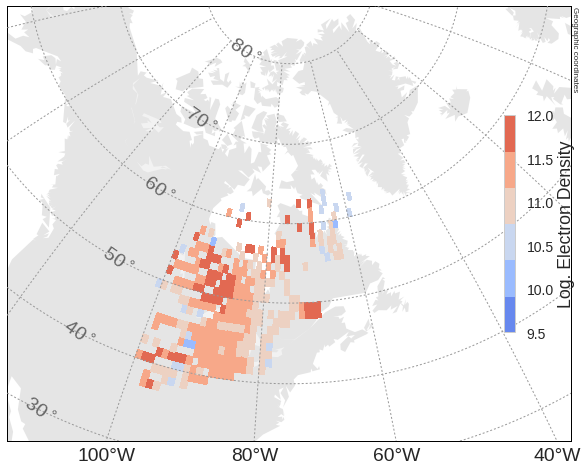

In [63]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=60., lon_0=-75, width=66e3*120,\
                           height=111e3*55, datetime=d1, gridLatRes=10. )

plotParamDF = mhDFAzm[ ["glon", "gdlat",\
                        plotParam] ]
plotParamDF["gdlat"] = numpy.round(plotParamDF["gdlat"])
plotParamDF["glon"] = numpy.round(plotParamDF["glon"])

plotParamDF = plotParamDF.groupby( ["glon", "gdlat"] ).mean().reset_index()
plotParamDF = plotParamDF[ ["glon", "gdlat",\
                        plotParam] ].pivot( "glon", "gdlat" )

# plotParamDF = pandas.pivot_table( plotParamDF, values=plotParam,\
#                     index=[ "glon" ], columns=[ "gdlat"],\
#                     aggfunc=numpy.mean )
# print plotParamDF
glonVals = plotParamDF.index.values 
gdlatVals = plotParamDF.columns.levels[1].values

glonCntr, gdlatCntr  = numpy.meshgrid( glonVals, gdlatVals )
# Mask the nan values! pcolormesh can't handle them well!
paramVals = numpy.ma.masked_where(\
                numpy.isnan(plotParamDF[plotParam].values),\
                plotParamDF[plotParam].values)
meshPlot = m1.pcolormesh(glonCntr.T , gdlatCntr.T, paramVals,\
                        cmap=pltCMap, vmin=pltScale[0],\
                        vmax=pltScale[1], zorder=7, latlon=True)
cbar = plt.colorbar(meshPlot, cmap=pltCMap, ax=ax, shrink=0.5, pad=-0.1)
cbar.set_label('Log. Electron Density')
cbar.ax.tick_params(labelsize=14) 